**Task** : Find a data set which is suitable for a regression task (you can use one of the data sets which you used in Homework I and there is no limit on the number of features or type of the features). Then, apply DecisionTreeRegressor and RandomForestRegressor to this data set to find the best performing model with respect to **mean squared error** metric. Report the feature importance of best performing algorithm and comment on it.

### TEMPERATURE REGRESSION WITH DATASET OF WEATHER CONDITIONS IN WORLD WAR II
---

### DATA DESCRIPTION
I will use the dataset of weather conditions in World War Two from kaggle (https://www.kaggle.com/usaf/world-war-ii) for this task. The data set consists of information about the weather conditions recorded every day, such as temperature, wind speed, at various weather stations around the world during the Second World War. Datasets contains the following columns. But i will only three of this features.

**Columns:** STA, **Date** , Precip, WindGustSpd, **MaxTemp**, **MinTemp**, MeanTemp, Snowfall, PoorWeather, YR, MO, DA, PRCP, DR, SPD, MAX, MIN, MEA, SNF, SND, FT, FB, FTI, ITH, PGT, TSHDSBRSGF, SD3, RHX, RHN, RVG, WTE.

I will create new dataframe with Date, MinTemp and MaxTemp, i will use the MinTemp and MaxTemp for regression.In this problem, I want to predict the maximum temperature based on minimum temperature.

- **Date**: The date the weather was recorded
- **MaxTemp**: Maximum temperature in degrees Celsius
- **MinTemp**: Minimum temperature in degrees Celsius

---

## PREPARING THE DATA

---

In [4]:
#import the data set
import numpy as np
import pandas as pd

weather_df = pd.read_csv("datasets/Summary of Weather.csv", low_memory=False)
weather_df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking the dimension

weather_df.shape

(119040, 31)

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

There is too much column. I want to use only a few of them.So i am creating new dataframe.

In [7]:
#creating new dataframE with only 3 column

features = ['MaxTemp','MinTemp','Date']
weather_df = weather_df[features]
weather_df

,MaxTemp,MinTemp,Date
0,25.555556,22.222222,1942-7-1
1,28.888889,21.666667,1942-7-2
2,26.111111,22.222222,1942-7-3
3,26.666667,22.222222,1942-7-4
4,26.666667,21.666667,1942-7-5
...,...,...,...
119035,28.333333,18.333333,1945-12-27
119036,29.444444,18.333333,1945-12-28
119037,28.333333,18.333333,1945-12-29
119038,28.333333,18.333333,1945-12-30


Text(0, 0.5, 'Maximum Temperature')

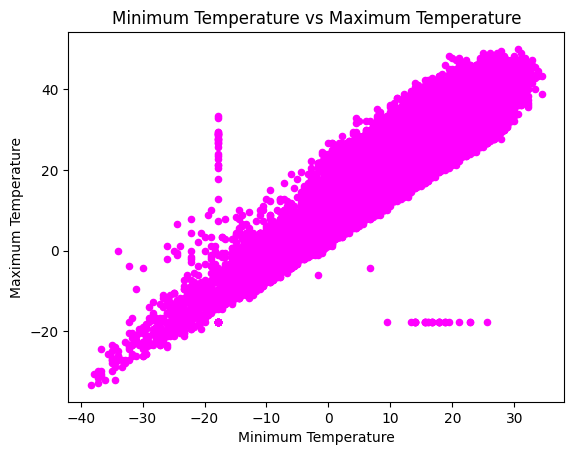

In [8]:
import matplotlib.pyplot as plt

weather_df.plot.scatter(x='MinTemp', y='MaxTemp', color = 'magenta')
plt.title('Minimum Temperature vs Maximum Temperature') 
plt.xlabel('Minimum Temperature')  
plt.ylabel('Maximum Temperature')  

In [9]:
#Checking if there any null values

weather_df.isnull().sum()

MaxTemp    0
MinTemp    0
Date       0
dtype: int64

**There is no any null value.**

In [10]:
from sklearn.model_selection import train_test_split


# Separate features and labels
x = weather_df[["MinTemp" ]]
y = weather_df[["MaxTemp"]]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# DECISION TREE REGRESSION

---

In [11]:
from sklearn.tree import DecisionTreeRegressor

#defining the decision tree regression model

decisiontree_model = DecisionTreeRegressor(random_state=42)

#fitting the model

decisiontree_model.fit(x_train, y_train)



DecisionTreeRegressor(random_state=42)

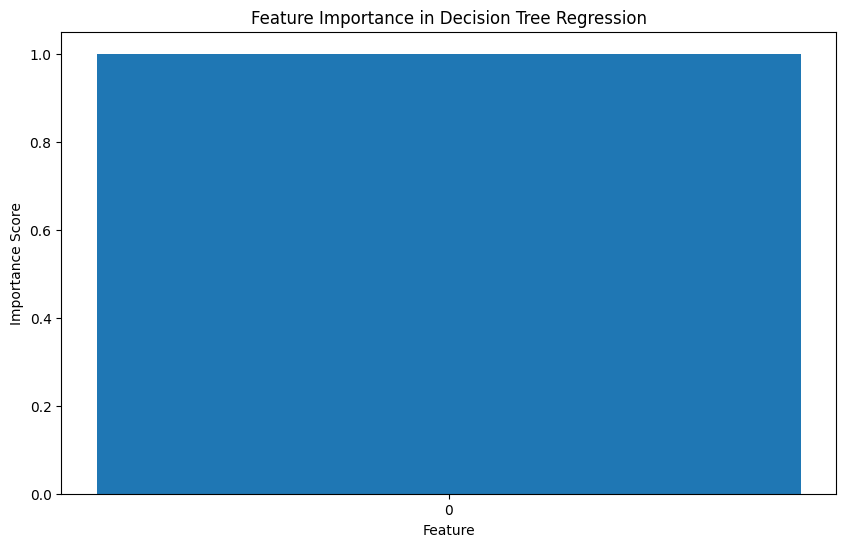

In [12]:
import matplotlib.pyplot as plt

# Get feature importances
importance_scores = decisiontree_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), sorted_scores, tick_label=sorted_indices)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Decision Tree Regression")
plt.show()

**Because of i regressed on maximum temperature based on minimum temperature.There is only one feature.**

In [13]:
#making a prediction for max temperature

y_pred = decisiontree_model.predict(x_test)
print(y_pred) 

[29.05149051 30.46432161 30.46432161 ... 29.49933014 30.46432161
 31.43109686]


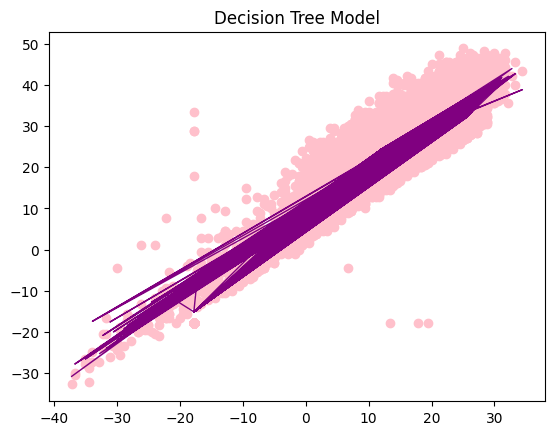

In [14]:
plt.scatter(x_test, y_test,  color='pink')
plt.plot(x_test, y_pred, color='purple', linewidth=1)
plt.title('Decision Tree Model')
plt.show()

In [15]:
# Calculating the mean squared error

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 14.46231486415675


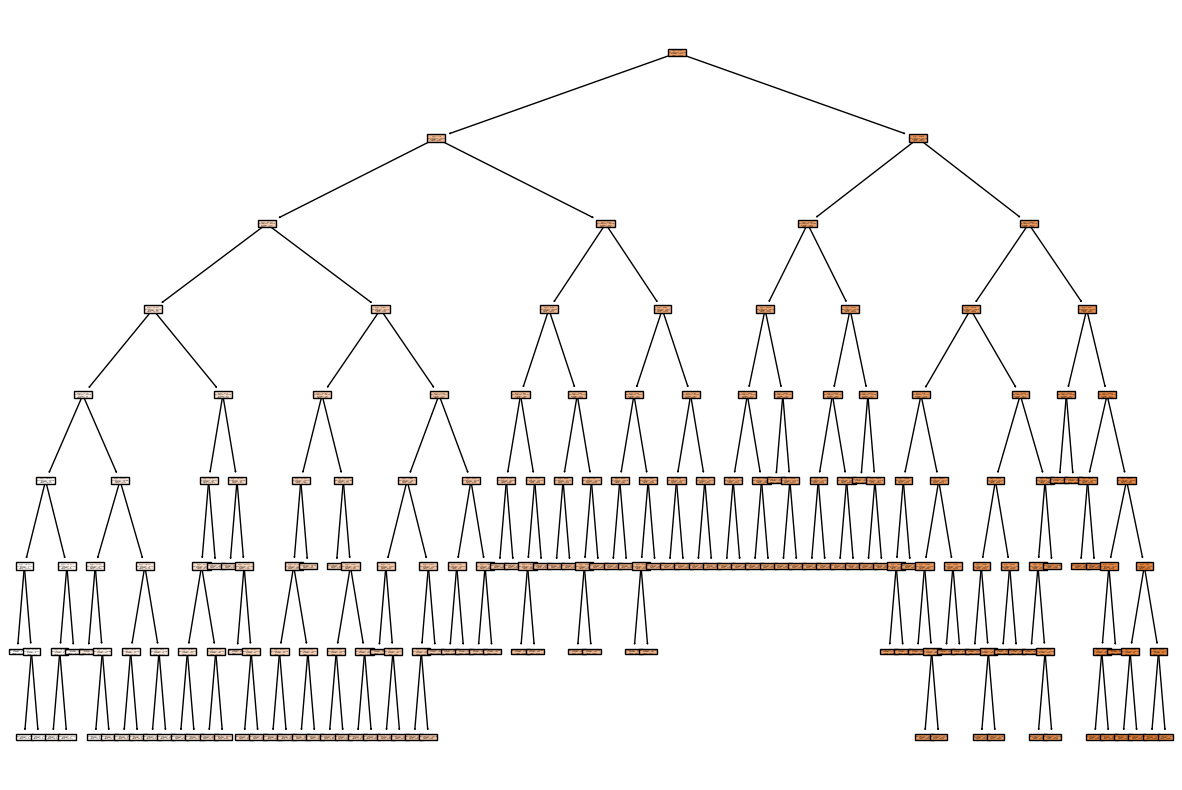

Mean Squared Error for best decision tree: 14.454534654504334


In [16]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

param_grid = {'max_depth': range(1, 10)}

grid_search = GridSearchCV(decisiontree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Selecting the best performing decision tree
best_regressor = grid_search.best_estimator_

# Making the best prediction with the best performing decision tree
y_bestpred = best_regressor.predict(x_test)

mse_best = mean_squared_error(y_test, y_bestpred)

plt.figure(figsize=(15, 10))
plot_tree(best_regressor, filled=True)
plt.show()

print("Mean Squared Error for best decision tree:", mse_best)

# RANDOM FOREST TREE REGRESSION
---

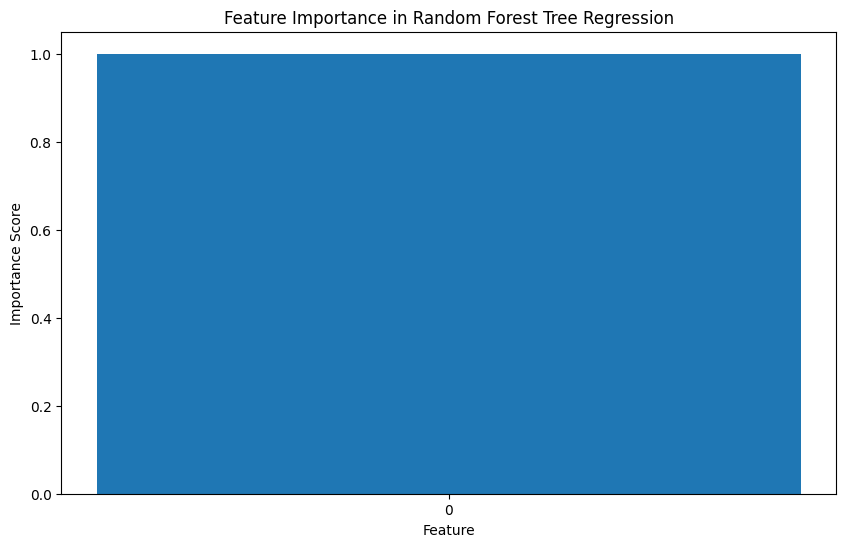

In [17]:
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor

#defining the random forest regression model
randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42)

#fitting the model
y_train = np.ravel(y_train)
randomforest_model.fit(x_train, y_train)

import matplotlib.pyplot as plt

# Get feature importances
importance_scoresrf = randomforest_model.feature_importances_

# Sort feature importances in descending order
sorted_indicesrf = importance_scoresrf.argsort()[::-1]
sorted_scoresrf = importance_scoresrf[sorted_indices]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), sorted_scoresrf, tick_label=sorted_indicesrf)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Tree Regression")
plt.show()

**Because of i regressed on maximum temperature based on minimum temperature.There is only one feature.**

In [26]:
#making a prediction for max temperature

y_rfpred = randomforest_model.predict(x_test)
print(y_rfpred) 

[29.02932732 30.45209794 30.45209794 ... 29.47793464 30.45209794
 31.46869705]


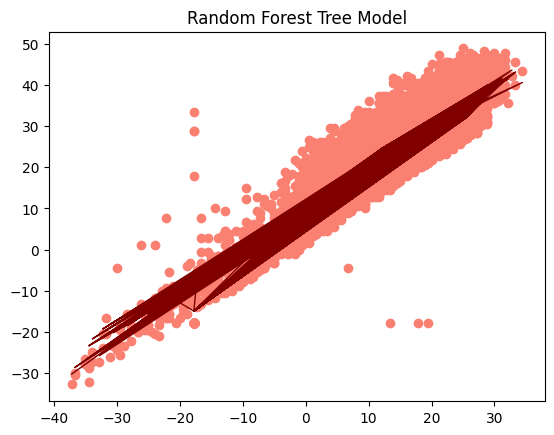

In [27]:
plt.scatter(x_test, y_test,  color='salmon')
plt.plot(x_test, y_rfpred, color='maroon', linewidth=1)
plt.title('Random Forest Tree Model')
plt.show()

In [39]:
# Calculating the mean squared error

from sklearn.metrics import mean_squared_error

mse_rf = mean_squared_error(y_test, y_rfpred)

print("Mean Squared Error:", mse_rf)

Mean Squared Error: 14.467892889362574


Mean Squared Error for best random forest tree: 14.513115609185778


C:\Users\mzemb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


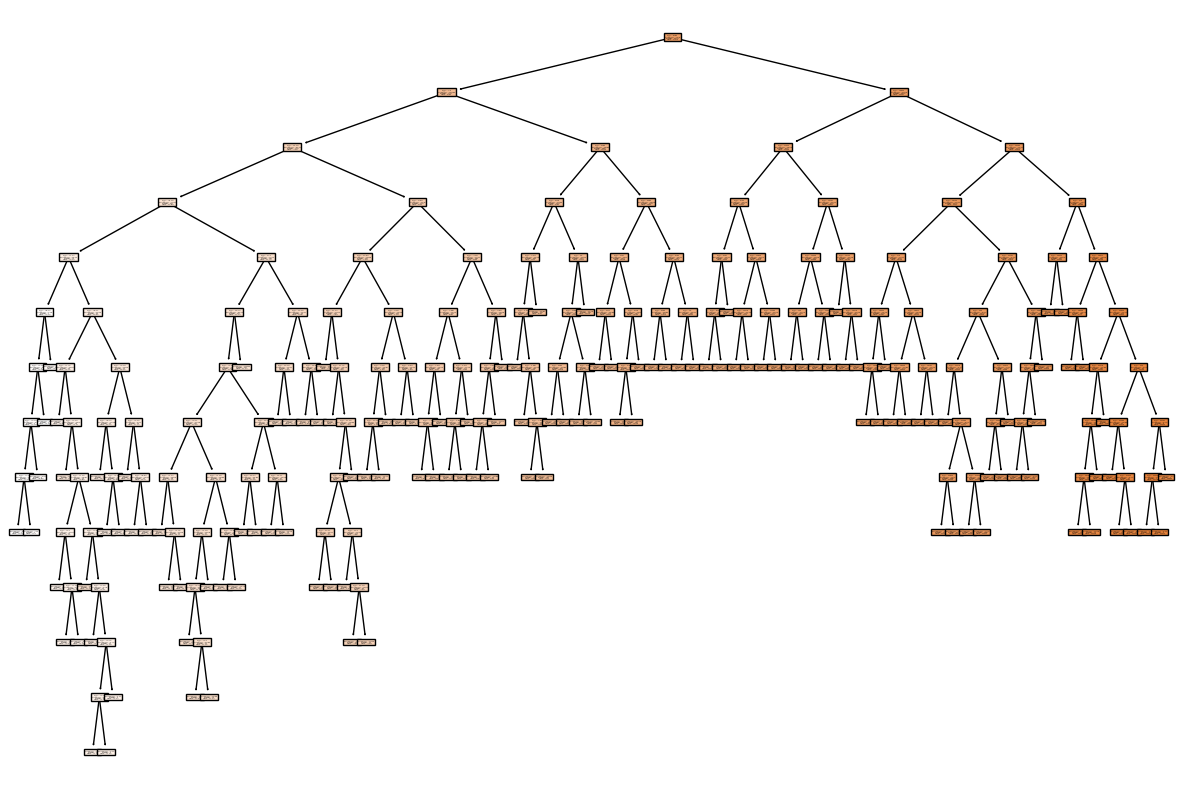

Mean Squared Error for best random forest tree: 14.513115609185778


In [43]:
tree_mses = []
tree_mses.append(mse_rf)

# Selecting the best performing tree
best_tree_index = tree_mses.index(min(tree_mses))
best_tree = randomforest_model.estimators_[best_tree_index]

# Calculating the MSE for the best tree
y_bestpredrf = best_tree.predict(x_test)
mse_bestrf = mean_squared_error(y_test, y_bestpredrf)

plt.figure(figsize=(15, 10))
plot_tree(best_tree, filled=True)
plt.show()

print("Mean Squared Error for best random forest tree:", mse_bestrf)

In [ ]:
print("Mean Squared Error Decision Tree Regression:", mse)
print("Mean Squared Error for Random Forest Tree Regression:", mse_rf)


## Conclusion
---

In [ ]:
#comparing the mean squared errors
print('MSE of Decision Tree Regression:',mse)
print('MSE of Random Forest Tree Regression:',mse_rf)
mse_values = [mse, mse_rf]
min(mse_values)

---
We can easily see that the mean squared error of "**Decision Tree Regression Model**" is les than mean squared of "Random Forest Decision Tree" model. So obviously, it can be said that decision tree regression model is best performing model for relationship between minimum temperature and maximum temperature in Weather Conditions in World War Two dataset .

---

In [46]:
import session_info

session_info.show()

---
## Reference

https://www.kaggle.com/datasets/smid80/weatherww2/code?datasetId=3759&sortBy=voteCount
